┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                             ┃
┃           Ex_01-a           ┃
┃                             ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃  -Número de ciclos >        ┃
┃     - 25                    ┃
┃  -Periodo >                 ┃
┃     - 2.041                 ┃
┃                             ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛


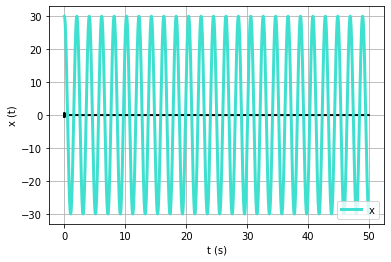

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Gravidade
g = 9.81

# Tempo inicial e final
ti = 0
tf = 50

# Comprimento
L = 1

# Angulo inicial
Ox0 = np.deg2rad(30)

# Velocidade angular inicial
wx0 = 0

# Aceleração angular inicial
ax0 = 0

# dt incremento do tempo e n numero de intervalos
dt = 0.001
n = int((tf - ti) / dt)

# Vetor tempo (n+1 para garantir que nao falta o ultimo dado (Ex: t[10]))
t = np.linspace(ti, tf, n + 1)

# Vetor velocidade (empty e não zeros para não alterar 
# muito o resultado se faltar analisar um dado)
Ox = np.empty(n + 1)
wx = np.empty(n + 1)
ax = np.empty(n + 1)

# Soma das amplitudes máximas sao máximas (x[i-1] < x[i] > x[i-1])
amps = 0
# Array de tempos (o seu tamanho é o número de amplitudes máximas encontradas (para fazer a média))
nAmps = []

periodoArray = []

# Introduzir x0 e v0 nos vetores da posição e velocidade
Ox[0] = Ox0
wx[0] = wx0
ax[0] = ax0

# Preencher os vetores x, v, a
for i in range(n):
    ax[i] = -g * np.sin(Ox[i]) / L
    wx[i + 1] = wx[i] + ax[i] * dt
    Ox[i + 1] = Ox[i] + wx[i + 1] * dt
    
    # Somar as amplitudes médias encontradas e incrementar o número destas encontradas
    if (Ox[i - 1] < Ox[i]) and (Ox[i] > Ox[i + 1]):
        nAmps.append(t[i])
                
        
for i in range(1, len(nAmps)):
    periodoArray.append(nAmps[i] - nAmps[i-1])
    
    
# Periodo = soma dos periodos / numero destes encontradas
periodo = sum(periodoArray) / len(periodoArray)
            
print("┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓")
print("┃                             ┃")
print("┃           Ex_01-a           ┃")
print("┃                             ┃")
print("┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫")
print("┃  -Número de ciclos >        ┃")
print("┃     - %-8s              ┃" % len(nAmps))
print("┃  -Periodo >                 ┃")
print("┃     - %-8s              ┃" % np.round(periodo, 4))
print("┃                             ┃")
print("┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛")


# Plot
plt.plot(t, Ox * 0, linestyle='-', linewidth=2, color="black")
plt.plot(t * 0, Ox, linestyle='-', linewidth=2, color="black")
plt.plot(t, np.rad2deg(Ox), label="x",  linestyle='-', linewidth=3, color="turquoise")
plt.xlabel("t (s)")
plt.ylabel("x (t)")
plt.legend()         # Legenda só aparece com isto
plt.grid()

    
    